In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import sys
from decimal import *
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
print(lats.min())
print(lats.max())
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

-89.98609126250075
89.65982019591974


602

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66


In [4]:
weather_data_list = []
cities_count = len(cities)

print('Begining Data Retrieval')

for i in range(len(cities)):
    target_url=url+"&q="+cities[i]
    print(target_url)
    
    if (i+1)%60==0:
        print('Taking break for a min--------------------')
        time.sleep(61)
        
        
    
    print(f"processing record {i} of {cities_count}")
    response = requests.get(target_url).json()
    
    if(response['cod']!='404'): #skipping the records where the API return status code "404" Not Found Error
        
        country=response['sys']['country']
        
        date=response['dt']
        
        lattitude=response['coord']['lat'] #reads the latitiude from the JSON response
        
        longitude=response['coord']['lon'] 
        
        temperature=response['main']['temp_max'] #temperature
                
        humidity=response['main']['humidity'] #humidity %
                
        clouds=response['clouds']['all'] #Clouds %
        
        windspeed=response['wind']['speed']

        
        #Creating a dictionary with weather data
        weather_data_dictionary = {"City":cities[i],"Cloudiness":clouds,"Country":country,"Date":date,"Humidity":humidity,"Lat":lattitude,"Lng":longitude,"Max Temp":temperature,"Wind Speed":windspeed}
        weather_data_list.append(weather_data_dictionary)

print("All Done!----------")
city_data_df = pd.DataFrame(weather_data_list)
        
    

Begining Data Retrieval
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=east london
processing record 0 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=puerto ayora
processing record 1 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=ambodifototra
processing record 2 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=velsk
processing record 3 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=cabo san lucas
processing record 4 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=grand gaube
processing record 5 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=cape town
processing 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=attawapiskat
processing record 58 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=tomatlan
Taking break for a min--------------------
processing record 59 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=dikson
processing record 60 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=teknaf
processing record 61 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=sao filipe
processing record 62 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=souillac
processing record 63 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=price
proces

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=bluff
processing record 117 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=wasaga beach
processing record 118 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=lodja
Taking break for a min--------------------
processing record 119 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=kinablangan
processing record 120 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=berlevag
processing record 121 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=westport
processing record 122 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=kapaa
p

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=opuwo
processing record 176 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=sarangani
processing record 177 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=ketou
processing record 178 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=nagato
Taking break for a min--------------------
processing record 179 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=aketi
processing record 180 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=bengkulu
processing record 181 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=mahebourg
processi

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=camrose
processing record 234 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=norman wells
processing record 235 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=saskylakh
processing record 236 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=sabang
processing record 237 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=amderma
processing record 238 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=saldanha
Taking break for a min--------------------
processing record 239 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=pitimbu

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=pisco
processing record 292 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=sao joao da barra
processing record 293 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=wadi musa
processing record 294 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=menongue
processing record 295 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=malaya vishera
processing record 296 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=teguldet
processing record 297 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=port-gentil
processing record 298 of 6

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=sao gabriel da cachoeira
processing record 351 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=pochutla
processing record 352 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=seoul
processing record 353 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=pinawa
processing record 354 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=nago
processing record 355 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=waddan
processing record 356 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=eureka
processing record 357 of 602
http://api

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=yuzhno-yeniseyskiy
processing record 411 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=bethel
processing record 412 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=kruisfontein
processing record 413 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=kalispell
processing record 414 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=irondequoit
processing record 415 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=nsanje
processing record 416 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=baijiantan
processing record 417 of 6

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=denpasar
processing record 469 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=sao carlos
processing record 470 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=vanimo
processing record 471 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=senanga
processing record 472 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=kuche
processing record 473 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=dunedin
processing record 474 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=trincomalee
processing record 475 of 602
http://api.open

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=acajutla
processing record 528 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=wanning
processing record 529 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=savonlinna
processing record 530 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=agirish
processing record 531 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=tilichiki
processing record 532 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=caraballeda
processing record 533 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=dingle
processing record 534 of 602
http://api.

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=hami
processing record 586 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=laakirchen
processing record 587 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=taltal
processing record 588 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=umzimvubu
processing record 589 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=mogadishu
processing record 590 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=tripoli
processing record 591 of 602
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902c261024299a24bf88a314f144db66&q=gondar
processing record 592 of 602
http://api.openwea

In [23]:
city_data_df.count()

City          532
Cloudiness    532
Country       532
Date          532
Humidity      532
Lat           532
Lng           532
Max Temp      532
Wind Speed    532
dtype: int64

In [24]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,east london,0,ZA,1535235886,94,-33.02,27.91,69.31,5.73
1,puerto ayora,75,EC,1535230800,69,-0.74,-90.35,75.20,16.11
2,velsk,0,RU,1535235982,81,61.07,42.10,56.80,7.96
3,cabo san lucas,20,MX,1535233680,58,22.89,-109.91,89.60,10.29
4,grand gaube,75,MU,1535234400,69,-20.01,57.66,73.40,14.99


In [25]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,east london,0,ZA,1535235886,94,-33.02,27.91,69.31,5.73
1,puerto ayora,75,EC,1535230800,69,-0.74,-90.35,75.20,16.11
2,velsk,0,RU,1535235982,81,61.07,42.10,56.80,7.96
3,cabo san lucas,20,MX,1535233680,58,22.89,-109.91,89.60,10.29
4,grand gaube,75,MU,1535234400,69,-20.01,57.66,73.40,14.99


In [39]:
#create a function to generate a scatter plot
def create_scatter_plot(chartName,x,y,title,xlabel,ylabel):
    
    now = datetime.now()
    now = now.strftime("%m/%d/%Y")
    
    fig = plt.figure(figsize=(18,9))
    plt.grid()
    plt.scatter(x,y,facecolors="blue", edgecolors="black",s=50)
    plt.xlim(-90,90)
    plt.title(f"{title} ({now})",fontsize=(18));
    plt.ylabel(ylabel,fontsize=(15));
    plt.xlabel(xlabel,fontsize=(15));
    plt.savefig(f"{chartName}.png")
    plt.show()
    
  

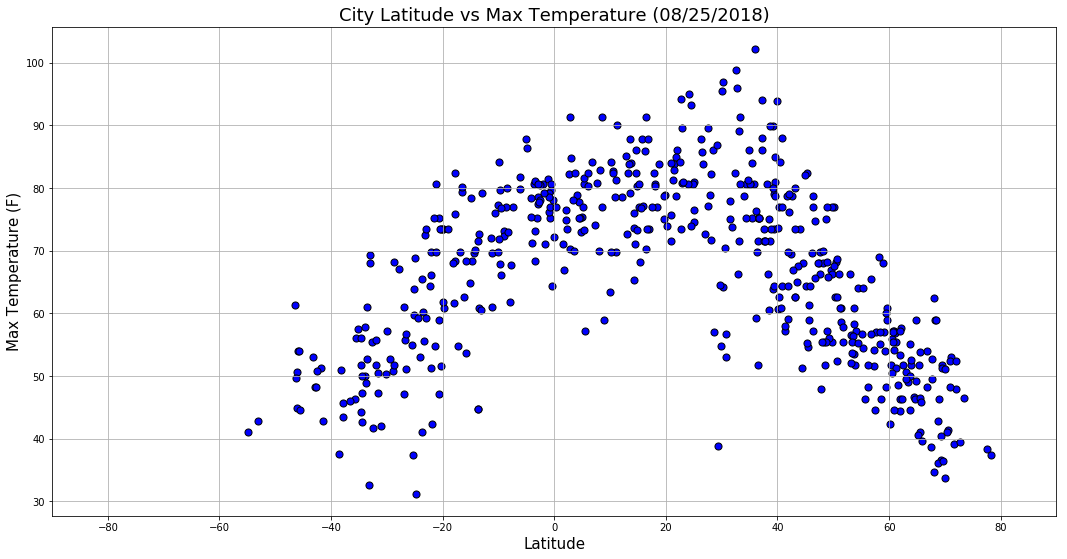

In [40]:
create_scatter_plot("CityLatitudeVsTemp",city_data_df['Lat'],city_data_df['Max Temp'],'City Latitude vs Max Temperature','Latitude','Max Temperature (F)')

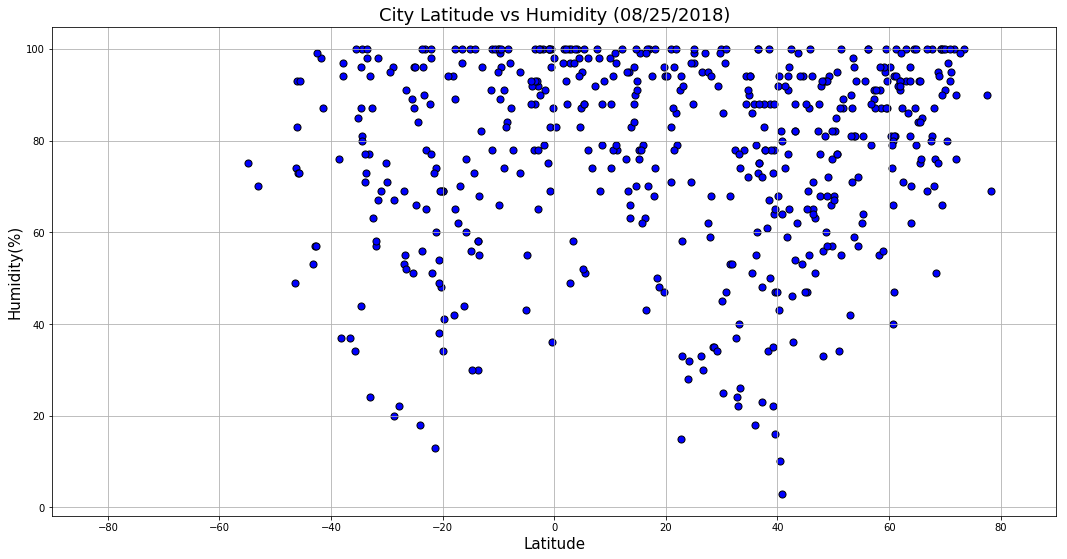

In [41]:
create_scatter_plot("CityLatitudeVsHumidity",city_data_df['Lat'],city_data_df['Humidity'],'City Latitude vs Humidity','Latitude','Humidity(%)')

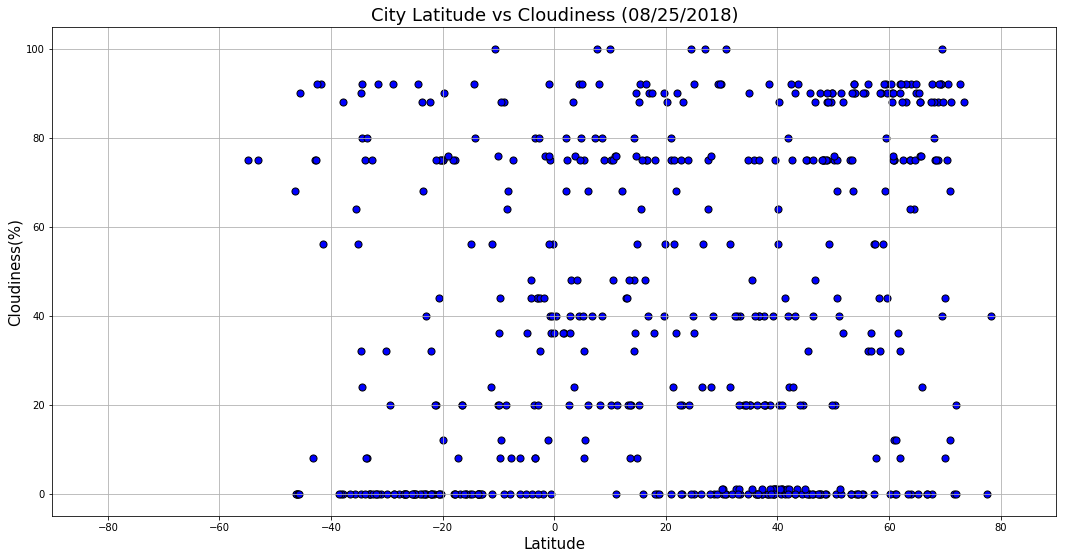

In [42]:
create_scatter_plot("CityLatitudeVsCloudiness",city_data_df['Lat'],city_data_df['Cloudiness'],'City Latitude vs Cloudiness','Latitude','Cloudiness(%)')

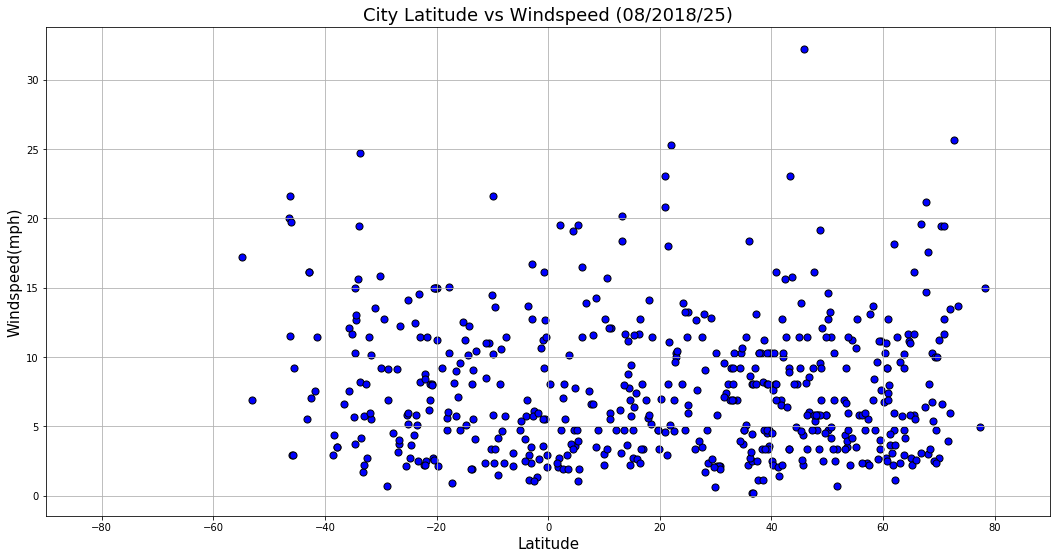

In [36]:
create_scatter_plot("CityLatitudeVsWindSpeed",city_data_df['Lat'],city_data_df['Wind Speed'],'City Latitude vs Windspeed','Latitude','Windspeed(mph)')

In [38]:
city_data_df.to_csv(output_data_file)